3. Perform linear regression with one feature using gradient descent (without using library function) to predict the salary of an employee based on the feature YearsExperience. Use hyper-parameter tuning for the best result. Plot the hypothesis function and the data points after each epoch. Evaluate the accuracy of the models by computing relevant performance metrics, including the R² value. Dataset: salary_dataset.csv

cost at 0 is 3251477635.366667


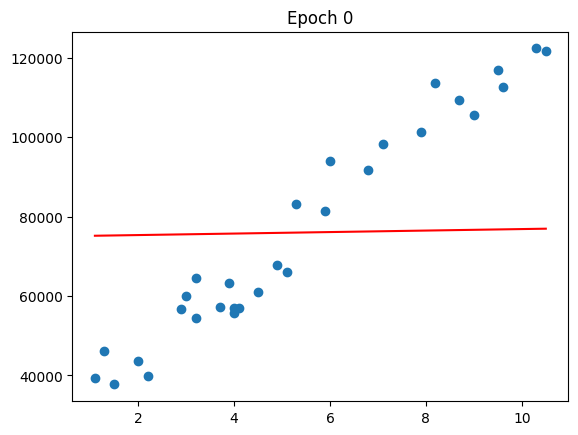

cost at 50 is 3251461235.2864995
cost at 100 is 3251455262.97065
cost at 150 is 3251453088.047043
cost at 200 is 3251452296.0074987


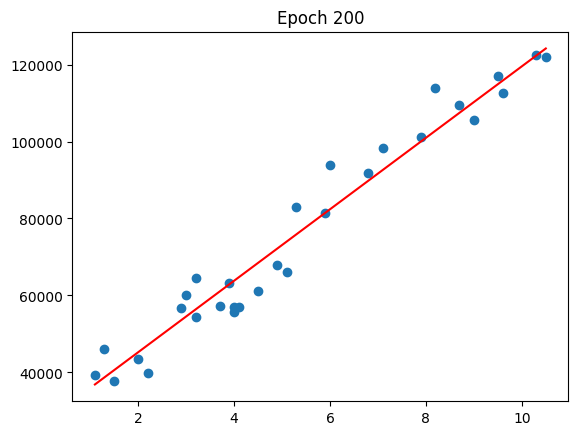

cost at 250 is 3251452007.570936
cost at 300 is 3251451902.531114
cost at 350 is 3251451864.2788
cost at 400 is 3251451850.348468


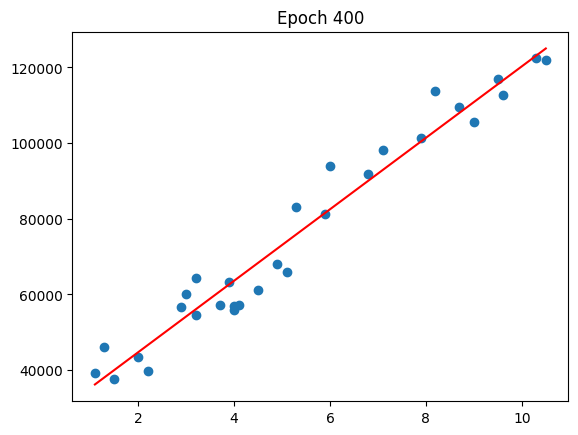

cost at 450 is 3251451845.2754626
cost at 500 is 3251451843.428028
cost at 550 is 3251451842.7552485
cost at 600 is 3251451842.510242


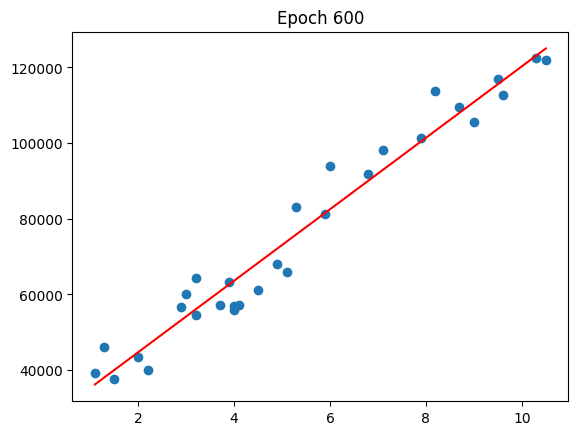

cost at 650 is 3251451842.4210186
cost at 700 is 3251451842.3885264
cost at 750 is 3251451842.3766937
cost at 800 is 3251451842.3723845


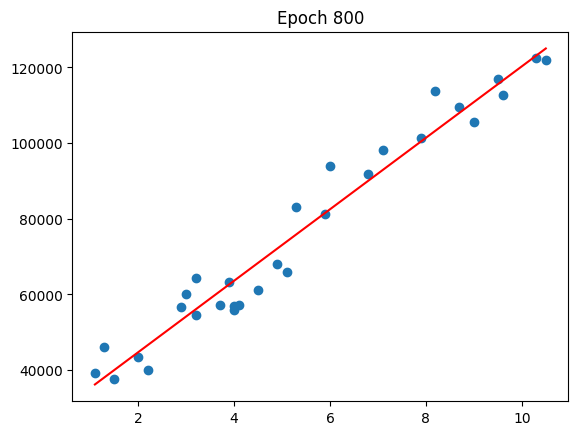

cost at 850 is 3251451842.370815
cost at 900 is 3251451842.370244
cost at 950 is 3251451842.3700356
R²: 0.96


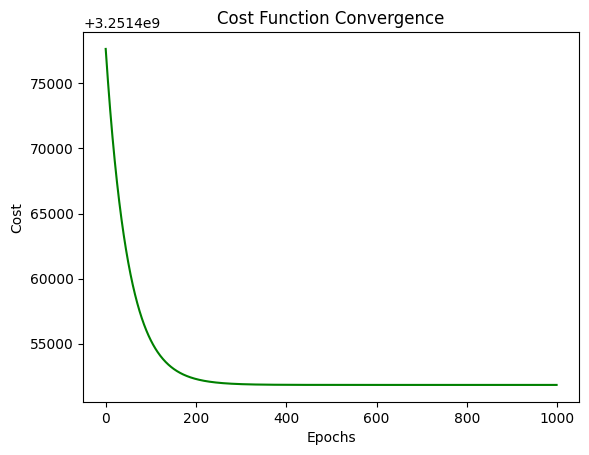

In [19]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Load dataset
salary_data = pd.read_csv('salary_data.csv')
X = salary_data['YearsExperience'].values.reshape(-1, 1)
y = salary_data['Salary'].values

# Normalize data
X_norm = (X - X.mean()) / X.std()
y_norm = (y - y.mean()) / y.std()

# Gradient Descent
theta = np.zeros(2)  # [theta0, theta1]
learning_rate = 0.01
epochs = 1000
cost_history = []
for epoch in range(epochs):
    # Hypothesis
    y_pred = theta[0] + theta[1] * X_norm.flatten()
    # Compute gradients
    grad0 = -2 * np.mean(y_norm - y_pred)
    grad1 = -2 * np.mean((y_norm - y_pred) * X_norm.flatten())
    # Compute error
    error = y_pred - y
    # Update theta
    theta -= learning_rate * np.array([grad0, grad1])
    # Compute cost (Mean Squared Error)
    cost = (1/(2*m)) * np.sum(error**2)
    cost_history.append(cost)
    
    if epoch%50==0:
            print(f"cost at {epoch} is {cost}")

    # Plot every 100 epochs
    if epoch % 200 == 0:
        plt.scatter(X, y)
        plt.plot(X, (theta[0] + theta[1] * X_norm.flatten()) * y.std() + y.mean(), color='red')
        plt.title(f'Epoch {epoch}')
        plt.show()

# Denormalize and compute R²
y_pred_final = (theta[0] + theta[1] * X_norm.flatten()) * y.std() + y.mean()
r2 = r2_score(y, y_pred_final)
print(f'R²: {r2:.2f}')

# Plot Cost Function Convergence
plt.plot(range(epochs), cost_history, color='green')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Cost Function Convergence')
plt.show()

The provided code implements **linear regression with one feature** (Years of Experience) using **gradient descent** (without using library functions) to predict the salary of an employee. Below is a step-by-step explanation:

---

### **1. Import Required Libraries**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

- **`pandas`**: For loading and manipulating the dataset.
- **`numpy`**: For numerical computations.
- **`matplotlib.pyplot`**: For visualizing the data and regression results.
- **`sklearn.metrics.r2_score`**: To evaluate the model's performance using the R² score.

---

### **2. Load the Dataset**


In [ ]:
salary_data = pd.read_csv('salary_data.csv')
X = salary_data['YearsExperience'].values.reshape(-1, 1)
y = salary_data['Salary'].values

- The dataset is loaded using `pandas.read_csv()`.
- **`X`**: Extracts the "YearsExperience" column as the feature.
- **`y`**: Extracts the "Salary" column as the target variable.

---

### **3. Normalize the Data**


In [ ]:
X_norm = (X - X.mean()) / X.std()
y_norm = (y - y.mean()) / y.std()

- The feature (`X`) and target (`y`) are normalized to have a mean of 0 and a standard deviation of 1. This helps gradient descent converge faster.

---

### **4. Initialize Parameters**


In [ ]:
theta = np.zeros(2)  # [theta0, theta1]
learning_rate = 0.01
epochs = 1000
cost_history = []

- **`theta`**: The parameters of the linear regression model, initialized to zeros.
  - `theta[0]`: Intercept (bias term).
  - `theta[1]`: Slope (weight for the feature).
- **`learning_rate`**: Controls the step size for parameter updates.
- **`epochs`**: Number of iterations for gradient descent.
- **`cost_history`**: Stores the cost (error) at each epoch for analysis.

---

### **5. Perform Gradient Descent**


In [ ]:
for epoch in range(epochs):
    # Hypothesis
    y_pred = theta[0] + theta[1] * X_norm.flatten()
    
    # Compute gradients
    grad0 = -2 * np.mean(y_norm - y_pred)
    grad1 = -2 * np.mean((y_norm - y_pred) * X_norm.flatten())
    
    # Update theta
    theta -= learning_rate * np.array([grad0, grad1])
    
    # Compute cost (Mean Squared Error)
    error = y_pred - y_norm
    cost = np.mean(error**2)
    cost_history.append(cost)
    
    # Print cost every 50 epochs
    if epoch % 50 == 0:
        print(f"Cost at epoch {epoch}: {cost}")
    
    # Plot hypothesis function every 200 epochs
    if epoch % 200 == 0:
        plt.scatter(X, y, color='blue', label='Data Points')
        plt.plot(X, (theta[0] + theta[1] * X_norm.flatten()) * y.std() + y.mean(), color='red', label='Hypothesis')
        plt.title(f'Epoch {epoch}')
        plt.xlabel('Years of Experience')
        plt.ylabel('Salary')
        plt.legend()
        plt.show()



#### Explanation:
1. **Hypothesis**: The predicted salary is computed using the linear equation:
   \[
   y_{\text{pred}} = \theta_0 + \theta_1 \cdot X_{\text{norm}}
   \]
2. **Gradients**: The gradients of the cost function with respect to `theta[0]` and `theta[1]` are computed:
   - Gradient for `theta[0]` (intercept): \(-2 \cdot \text{mean}(y_{\text{norm}} - y_{\text{pred}})\)
   - Gradient for `theta[1]` (slope): \(-2 \cdot \text{mean}((y_{\text{norm}} - y_{\text{pred}}) \cdot X_{\text{norm}})\)
3. **Parameter Update**: The parameters (`theta`) are updated using the gradients and the learning rate:
   \[
   \theta = \theta - \alpha \cdot \text{gradient}
   \]
4. **Cost Function**: The Mean Squared Error (MSE) is computed to evaluate the model's performance:
   \[
   \text{Cost} = \frac{1}{m} \sum (y_{\text{pred}} - y_{\text{norm}})^2
   \]
5. **Visualization**: Every 200 epochs, the hypothesis function (regression line) is plotted along with the data points.

---

### **6. Denormalize Predictions and Compute R²**


In [ ]:
y_pred_final = (theta[0] + theta[1] * X_norm.flatten()) * y.std() + y.mean()
r2 = r2_score(y, y_pred_final)
print(f'R²: {r2:.2f}')

- The final predictions are **denormalized** to match the original scale of the target variable (`y`).
- The **R² score** is computed to evaluate how well the model explains the variance in the data.

---

### **7. Plot Cost Function Convergence**


In [ ]:
plt.plot(range(epochs), cost_history, color='green')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Cost Function Convergence')
plt.show()

- The cost function is plotted over the epochs to visualize how the error decreases as the model learns.

---

### **Key Outputs**
1. **Final Parameters**:
   - `theta[0]`: Intercept of the regression line.
   - `theta[1]`: Slope of the regression line.
2. **R² Score**:
   - Indicates the goodness of fit (closer to 1 is better).
3. **Plots**:
   - Hypothesis function (regression line) vs data points at different epochs.
   - Cost function convergence over epochs.

---

### **Summary**
- The code implements **linear regression** using **gradient descent** without relying on library functions.
- The model is trained to predict the salary of an employee based on years of experience.
- The performance is evaluated using the **R² score** and visualized through plots of the hypothesis function and cost function convergence.

R²: 0.96


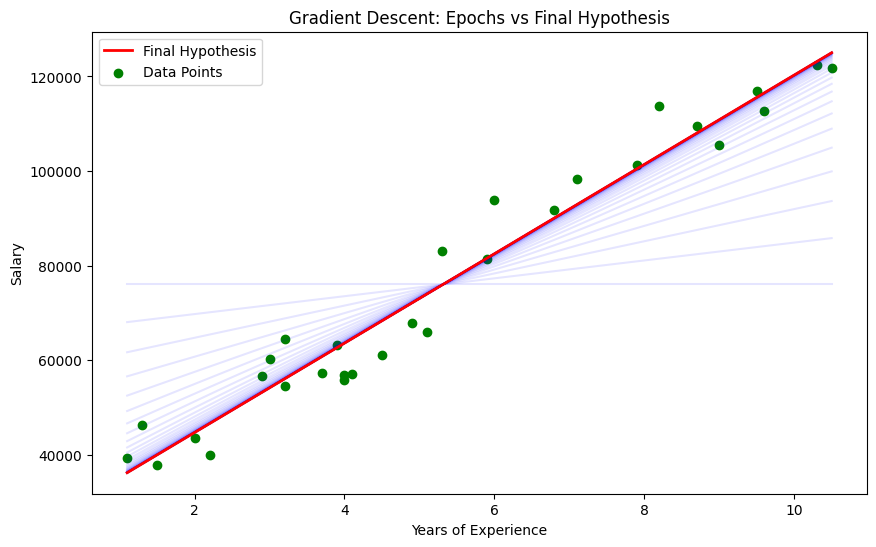

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Load dataset
salary_data = pd.read_csv('salary_data.csv')
X = salary_data['YearsExperience'].values.reshape(-1, 1)
y = salary_data['Salary'].values

# Normalize data
X_norm = (X - X.mean()) / X.std()
y_norm = (y - y.mean()) / y.std()

# Gradient Descent
theta = np.zeros(2)  # [theta0, theta1]
learning_rate = 0.1
epochs = 50

# Store predictions for each epoch
epoch_predictions = []

# Perform gradient descent
for epoch in range(epochs):
    # Hypothesis
    y_pred = theta[0] + theta[1] * X_norm.flatten()
    epoch_predictions.append(y_pred)  # Store predictions for this epoch
    
    # Compute gradients
    grad0 = -2 * np.mean(y_norm - y_pred)
    grad1 = -2 * np.mean((y_norm - y_pred) * X_norm.flatten())
    
    # Update theta
    theta -= learning_rate * np.array([grad0, grad1])

# Denormalize predictions
y_pred_final = (theta[0] + theta[1] * X_norm.flatten()) * y.std() + y.mean()
r2 = r2_score(y, y_pred_final)
print(f'R²: {r2:.2f}')

# Plot all epochs in a single graph
plt.figure(figsize=(10, 6))
for i, y_pred_epoch in enumerate(epoch_predictions):
    # Denormalize predictions for plotting
    y_pred_epoch_denorm = y_pred_epoch * y.std() + y.mean()
    plt.plot(X, y_pred_epoch_denorm, alpha=0.1, color='blue')  # Plot each epoch

# Plot final hypothesis
plt.plot(X, y_pred_final, color='red', linewidth=2, label='Final Hypothesis')

# Plot data points
plt.scatter(X, y, color='green', label='Data Points')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Gradient Descent: Epochs vs Final Hypothesis')
plt.legend()
plt.show()

cost at 0 is 3251477635.366667


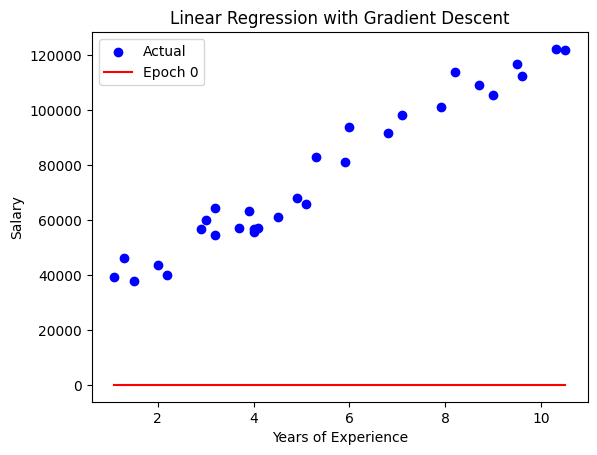

cost at 1 is 2353531436.1038833
cost at 2 is 1704765307.1365223
cost at 3 is 1236031778.957604
cost at 4 is 897371804.8483353
cost at 5 is 652689973.5543886
cost at 6 is 475907350.44451225
cost at 7 is 348181905.24762654
cost at 8 is 255900271.0928768
cost at 9 is 189226790.41607
cost at 10 is 141055200.62707707


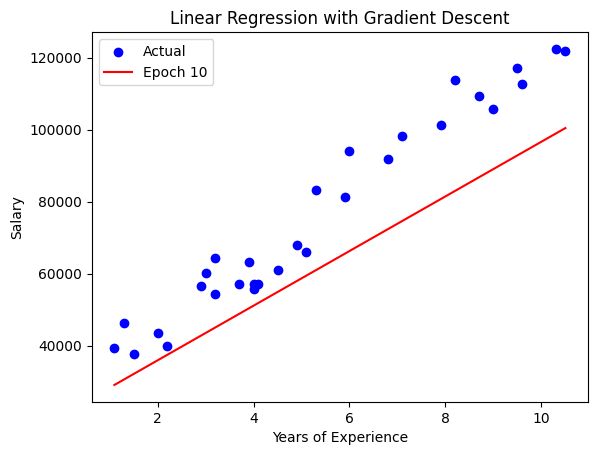

cost at 11 is 106251227.0045297
cost at 12 is 81105356.06223918
cost at 13 is 62937464.30643434
cost at 14 is 49811162.512865275
cost at 15 is 40327409.46701168
cost at 16 is 33475397.89138246
cost at 17 is 28524819.52799031
cost at 18 is 24948026.66043945
cost at 19 is 22363793.813634004
cost at 20 is 20496685.58181703


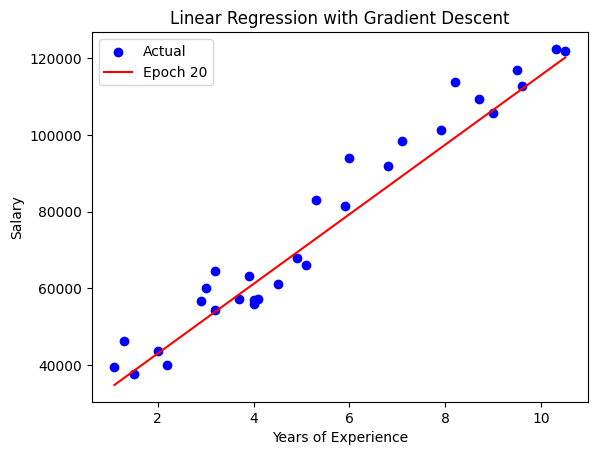

cost at 21 is 19147699.884329285
cost at 22 is 18173057.7178944
cost at 23 is 17468878.752645206
cost at 24 is 16960109.450252637
cost at 25 is 16592523.62927401
cost at 26 is 16326942.873616977
cost at 27 is 16135060.777654758
cost at 28 is 15996425.96332204
cost at 29 is 15896262.30996665
cost at 30 is 15823894.07041739


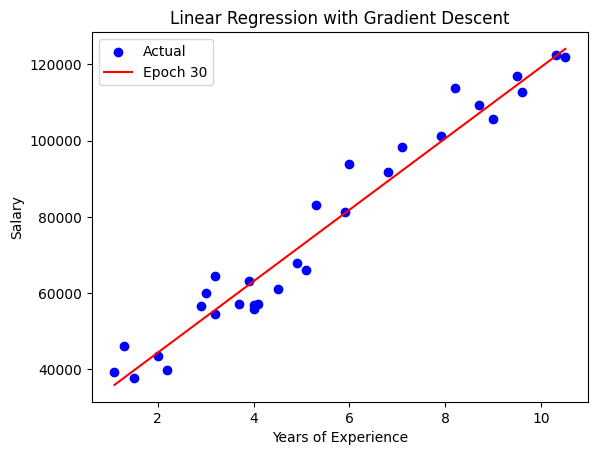

cost at 31 is 15771608.017343048
cost at 32 is 15733831.343996838
cost at 33 is 15706537.69750419
cost at 34 is 15686818.037913268
cost at 35 is 15672570.583858829
cost at 36 is 15662276.798304485
cost at 37 is 15654839.538241474
cost at 38 is 15649466.11784595
cost at 39 is 15645583.821610175
cost at 40 is 15642778.862579836


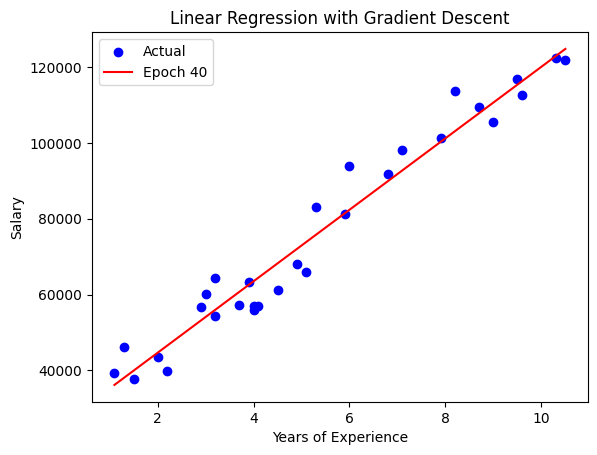

cost at 41 is 15640752.279680414
cost at 42 is 15639288.073535588
cost at 43 is 15638230.184595944
cost at 44 is 15637465.859837051
cost at 45 is 15636913.635198748
cost at 46 is 15636514.652897581
cost at 47 is 15636226.388184989
cost at 48 is 15636018.116930135
cost at 49 is 15635867.640948508
cost at 50 is 15635758.92205178


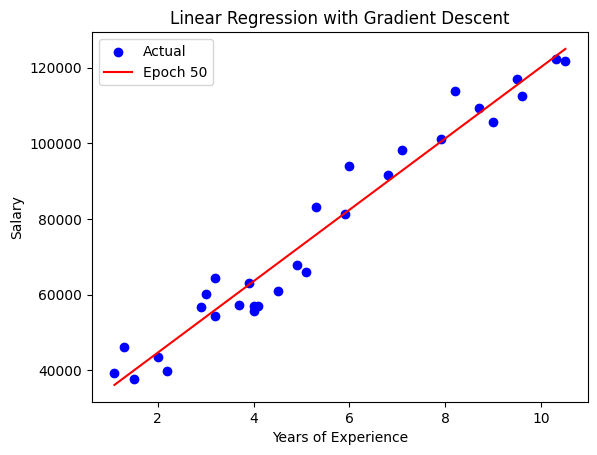

cost at 51 is 15635680.372648893
cost at 52 is 15635623.620705305
cost at 53 is 15635582.617426062
cost at 54 is 15635552.992556814
cost at 55 is 15635531.58858879
cost at 56 is 15635516.124221878
cost at 57 is 15635504.95121679
cost at 58 is 15635496.878720617
cost at 59 is 15635491.046342134
cost at 60 is 15635486.83244867


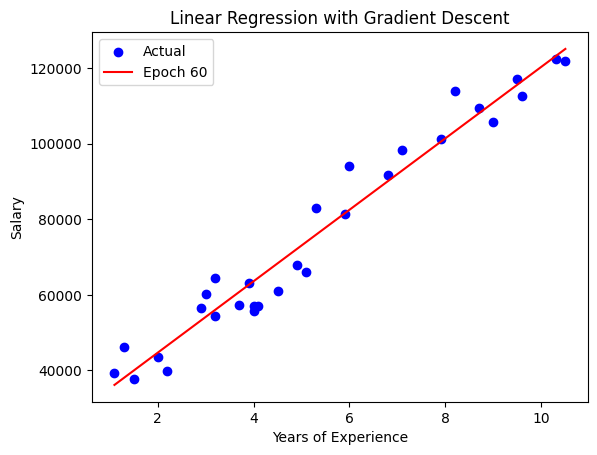

cost at 61 is 15635483.787910646
cost at 62 is 15635481.588231925
cost at 63 is 15635479.998964049
cost at 64 is 15635478.850718012
cost at 65 is 15635478.021110242
cost at 66 is 15635477.421718633
cost at 67 is 15635476.988658203
cost at 68 is 15635476.675772028
cost at 69 is 15635476.44971178
cost at 70 is 15635476.286383238


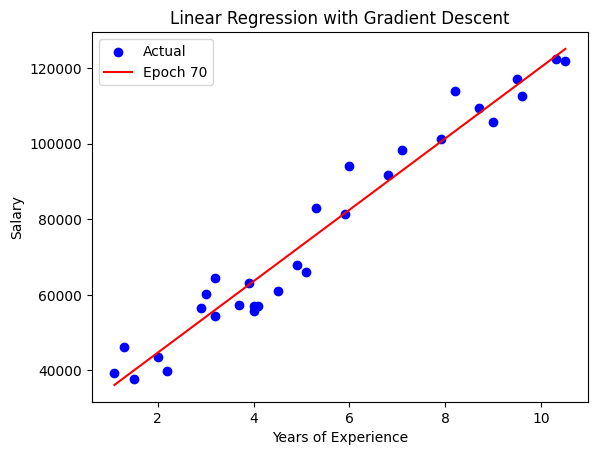

cost at 71 is 15635476.168378377
cost at 72 is 15635476.083119856
cost at 73 is 15635476.021520583
cost at 74 is 15635475.977015104
cost at 75 is 15635475.9448599
cost at 76 is 15635475.921627756
cost at 77 is 15635475.904842542
cost at 78 is 15635475.892715212
cost at 79 is 15635475.883953221
cost at 80 is 15635475.87762269


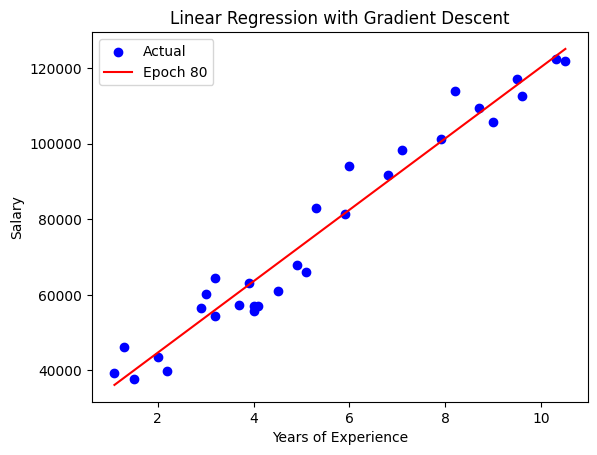

cost at 81 is 15635475.873048874
cost at 82 is 15635475.8697443
cost at 83 is 15635475.867356742
cost at 84 is 15635475.865631728
cost at 85 is 15635475.864385407
cost at 86 is 15635475.86348494
cost at 87 is 15635475.862834347
cost at 88 is 15635475.862364301
cost at 89 is 15635475.862024691
cost at 90 is 15635475.861779317


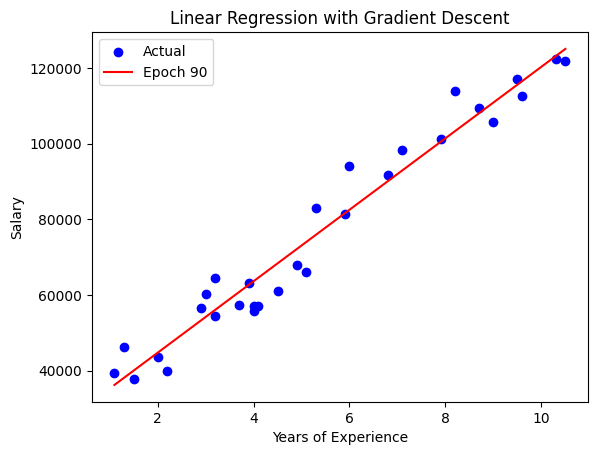

cost at 91 is 15635475.861602042
cost at 92 is 15635475.86147396
cost at 93 is 15635475.86138141
cost at 94 is 15635475.861314563
cost at 95 is 15635475.861266254
cost at 96 is 15635475.861231359
cost at 97 is 15635475.861206137
cost at 98 is 15635475.861187918
cost at 99 is 15635475.861174757
Final Parameters: Theta0 = 76002.9934, Theta1 = 26367.1801
Final R² Score: 0.9570


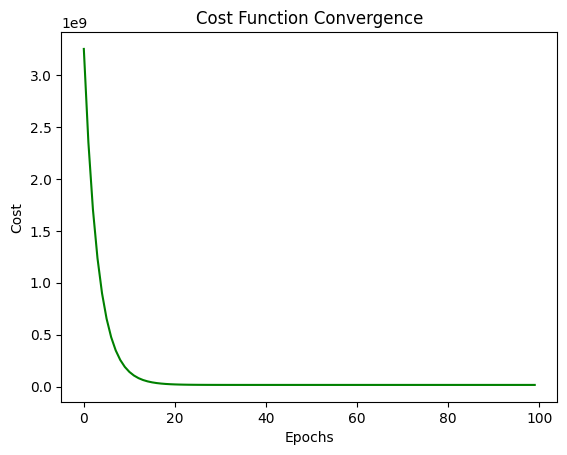

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Load dataset
df = pd.read_csv('salary_data.csv')

# Extract feature (YearsExperience) and target (Salary)
X = df['YearsExperience'].values  # Feature
y = df['Salary'].values  # Target

# Normalize X for faster convergence
X_mean = np.mean(X)
X_std = np.std(X)
X = (X - X_mean) / X_std  # Standardization

# Add bias term (X0 = 1)
X = np.c_[np.ones(X.shape[0]), X]  # Shape (m, 2)

# Initialize parameters (theta0, theta1)
theta = np.zeros(2)

# Hyperparameters
learning_rate = 0.15
epochs = 100  # Number of iterations

# Number of training examples
m = len(y)

# Cost function history
cost_history = []

# Gradient Descent
for epoch in range(epochs):
    # Compute predictions
    y_pred = X.dot(theta)
    
    # Compute error
    error = y_pred - y
    
    # Compute gradients
    gradients = (1/m) * X.T.dot(error)
    
    # Update parameters
    theta -= learning_rate * gradients
    
    # Compute cost (Mean Squared Error)
    cost = (1/(2*m)) * np.sum(error**2)
    print(f"cost at {epoch} is {cost}")
    cost_history.append(cost)
    
    # Plot regression line every 10 epochs
    if epoch % 10 == 0:
        plt.scatter(df['YearsExperience'], y, color='blue', label='Actual')
        plt.plot(df['YearsExperience'], y_pred, color='red', label=f'Epoch {epoch}')
        plt.xlabel('Years of Experience')
        plt.ylabel('Salary')
        plt.title('Linear Regression with Gradient Descent')
        plt.legend()
        plt.show()

# Final model predictions
y_pred_final = X.dot(theta)

# Compute R² Score
r2 = r2_score(y, y_pred_final)

print(f"Final Parameters: Theta0 = {theta[0]:.4f}, Theta1 = {theta[1]:.4f}")
print(f"Final R² Score: {r2:.4f}")

# Plot Cost Function Convergence
plt.plot(range(epochs), cost_history, color='green')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Cost Function Convergence')
plt.show()
